In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
time_folder = "24-08-10-v6"
base_folder = "/data3/lsf/Pein/Power-Prediction/res_output/"

path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
clip_value = 30
df["train_rmse"] = df["train_rmse"].clip(upper=clip_value)
df["val_rmse"] = df["val_rmse"].clip(upper=clip_value)
df["test_rmse"] = df["test_rmse"].clip(upper=clip_value)

# Display the first few rows of the dataframe
print(df.head())

# remove those rows where the val_rmse and test_rmse are larger than 1000
# df = df[df["val_rmse"] <= 1000]
# df = df[df["test_rmse"] <= 1000]


           exp_date  train_rmse  train_custom_acc  val_rmse_for_best_train  \
0  2024-08-11 12:06   27.897789         94.584900                389.16034   
1  2024-08-11 20:00   32.312010         93.829071                369.70212   
2  2024-08-11 12:40   20.563640         95.689178                378.68414   
3  2024-08-11 14:07   35.628540         92.710243                347.12656   
4  2024-08-11 21:20   17.250850         96.543869                377.21542   

   val_custom_acc_for_best_train  test_rmse_for_best_train  \
0                      43.268768                 360.60123   
1                      47.291035                 377.34980   
2                      46.578533                 352.02982   
3                      46.834141                 387.35745   
4                      52.175900                 389.95190   

   test_custom_acc_for_best_train  train_epoch_for_best_train   val_rmse  \
0                       40.444691                          45  777.85890   
1     

In [14]:
# # Correlation matrix
# corr_matrix = df[
#     [
#         "train_rmse",
#         "val_rmse",
#         "test_rmse",
#         "seq_len",
#         "lr",
#         "d",
#         "hid_d",
#         "last_d",
#         "time_d",
#         "e_layers",
#         "bs",
#     ]
# ].corr()

# # Heatmap of the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

In [15]:
# # Pairplot to visualize relationships
# sns.pairplot(
#     df[
#         [
#             "train_rmse",
#             "val_rmse",
#             "test_rmse",
#             "seq_len",
#             "lr",
#             "d",
#             "hid_d",
#             "last_d",
#             "time_d",
#             "e_layers",
#             "bs",
#         ]
#     ]
# )
# plt.show()

In [16]:
def plot_rmse_effects(df, x, y=['train_rmse', 'val_rmse', 'test_rmse']):
    for rmse in y:
        fig, axes = plt.subplots(3, 3, figsize=(18, 18))

        for i, feature in enumerate(x):
            row = i // 3
            col = i % 3
            sns.boxplot(ax=axes[row, col], x=feature, y=rmse, data=df)
            for label in axes[row, col].get_xticklabels():
                label.set_rotation(45)
        
        # Adjust layout to make sure plots are not overlapping
        plt.tight_layout()
        plt.show()

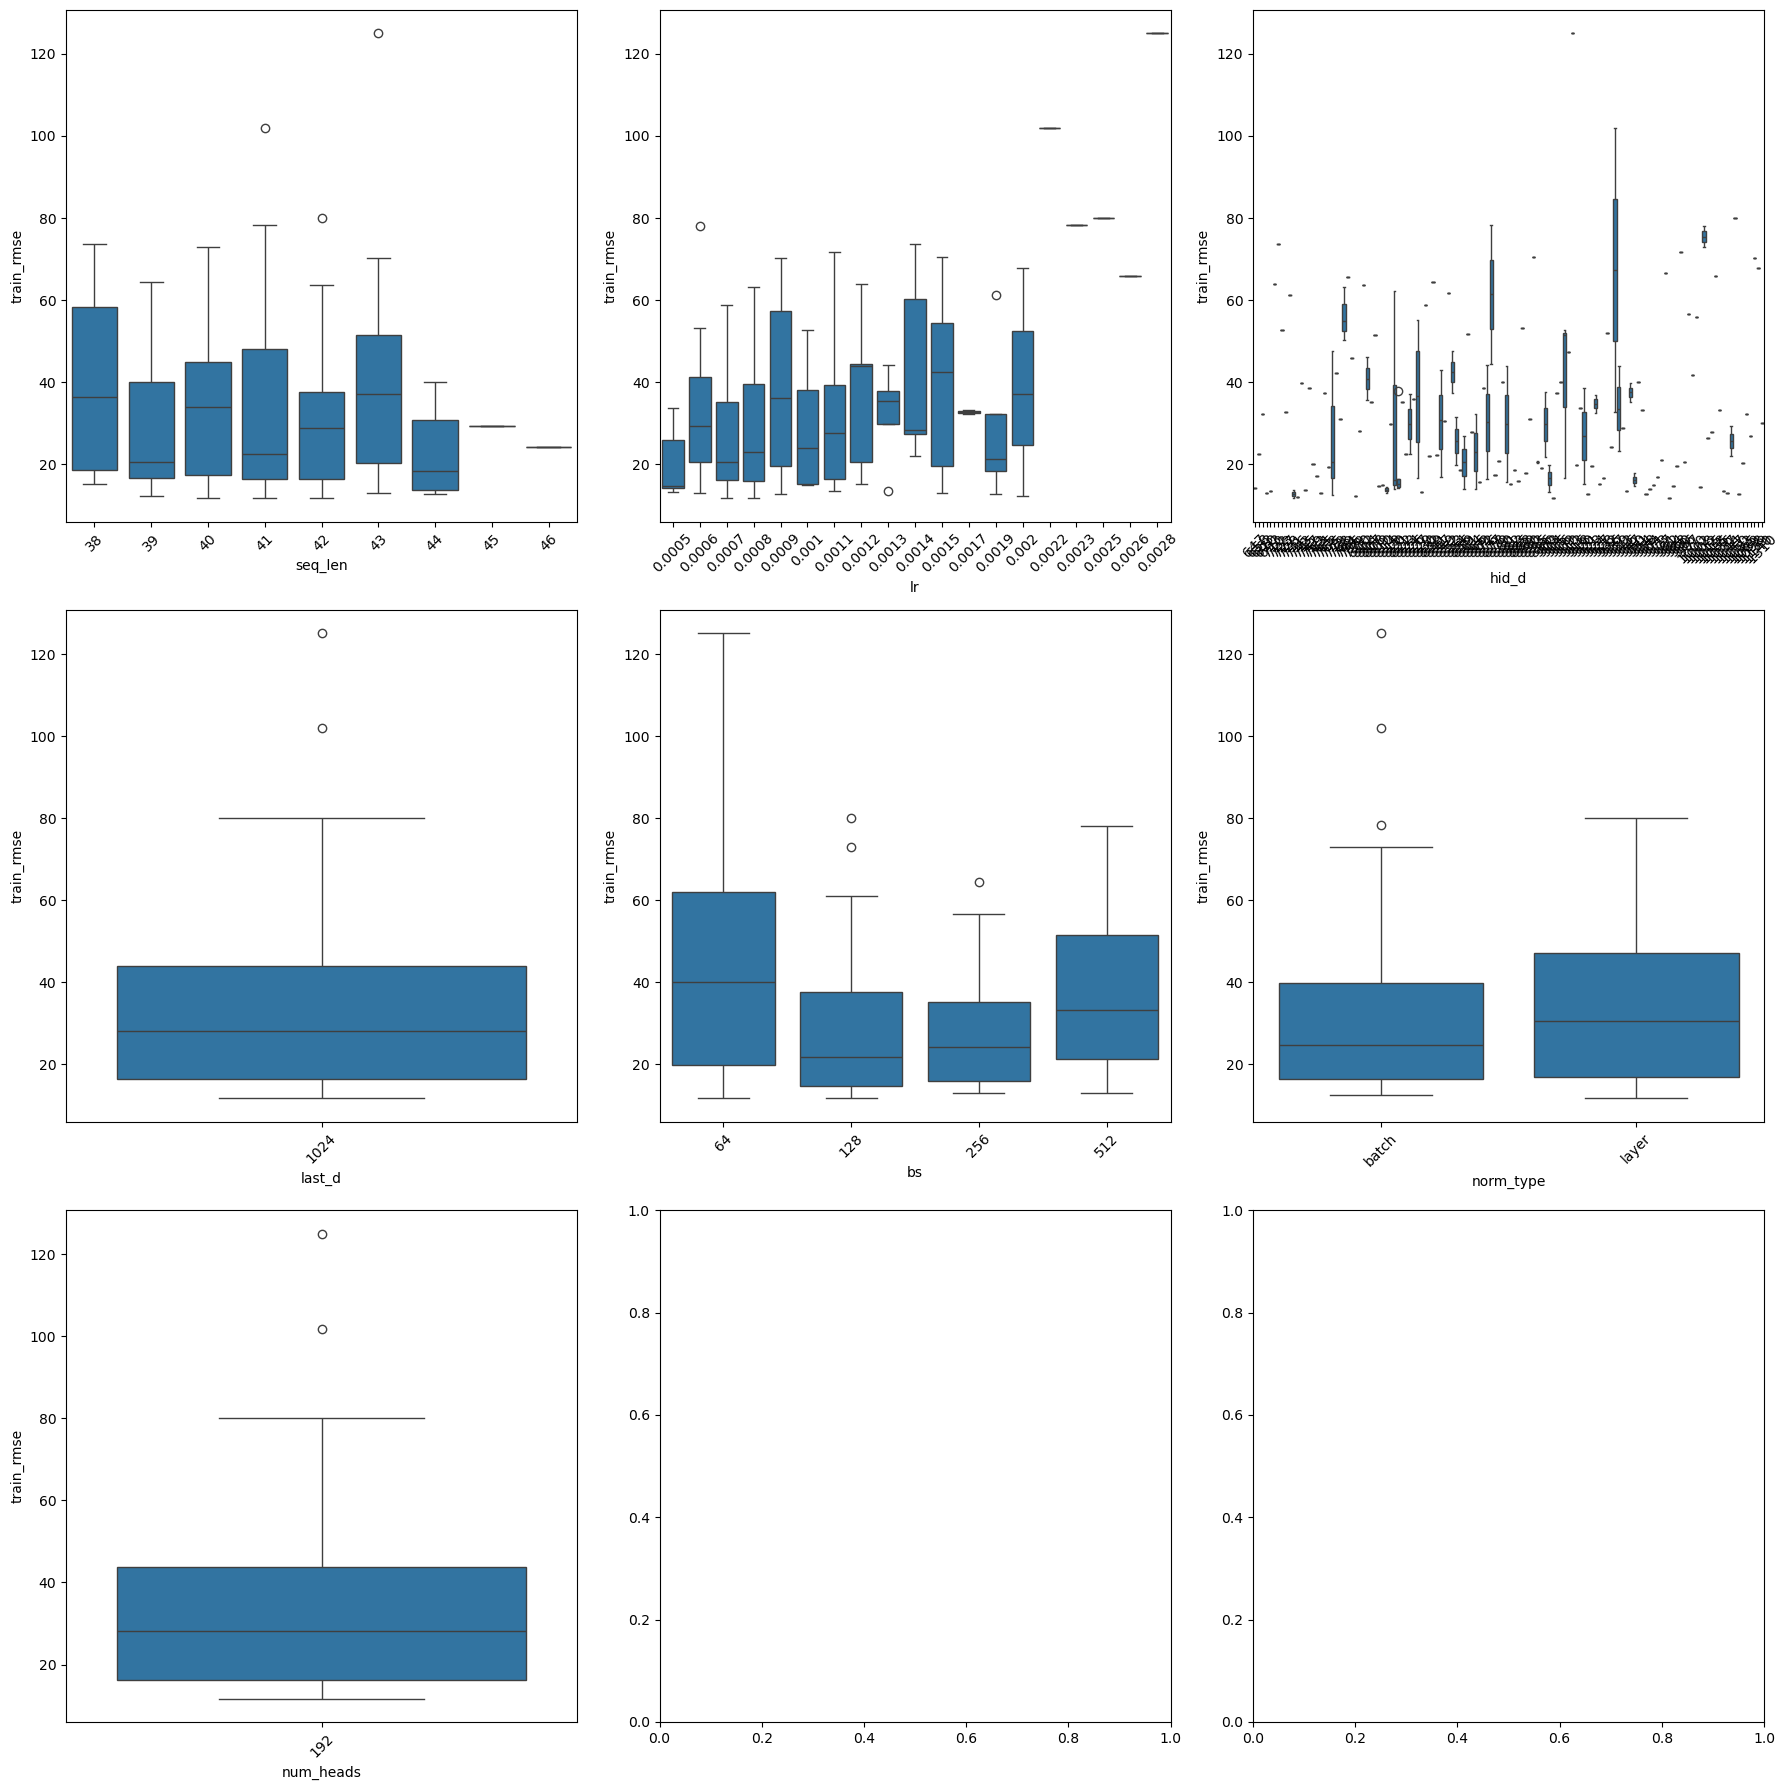

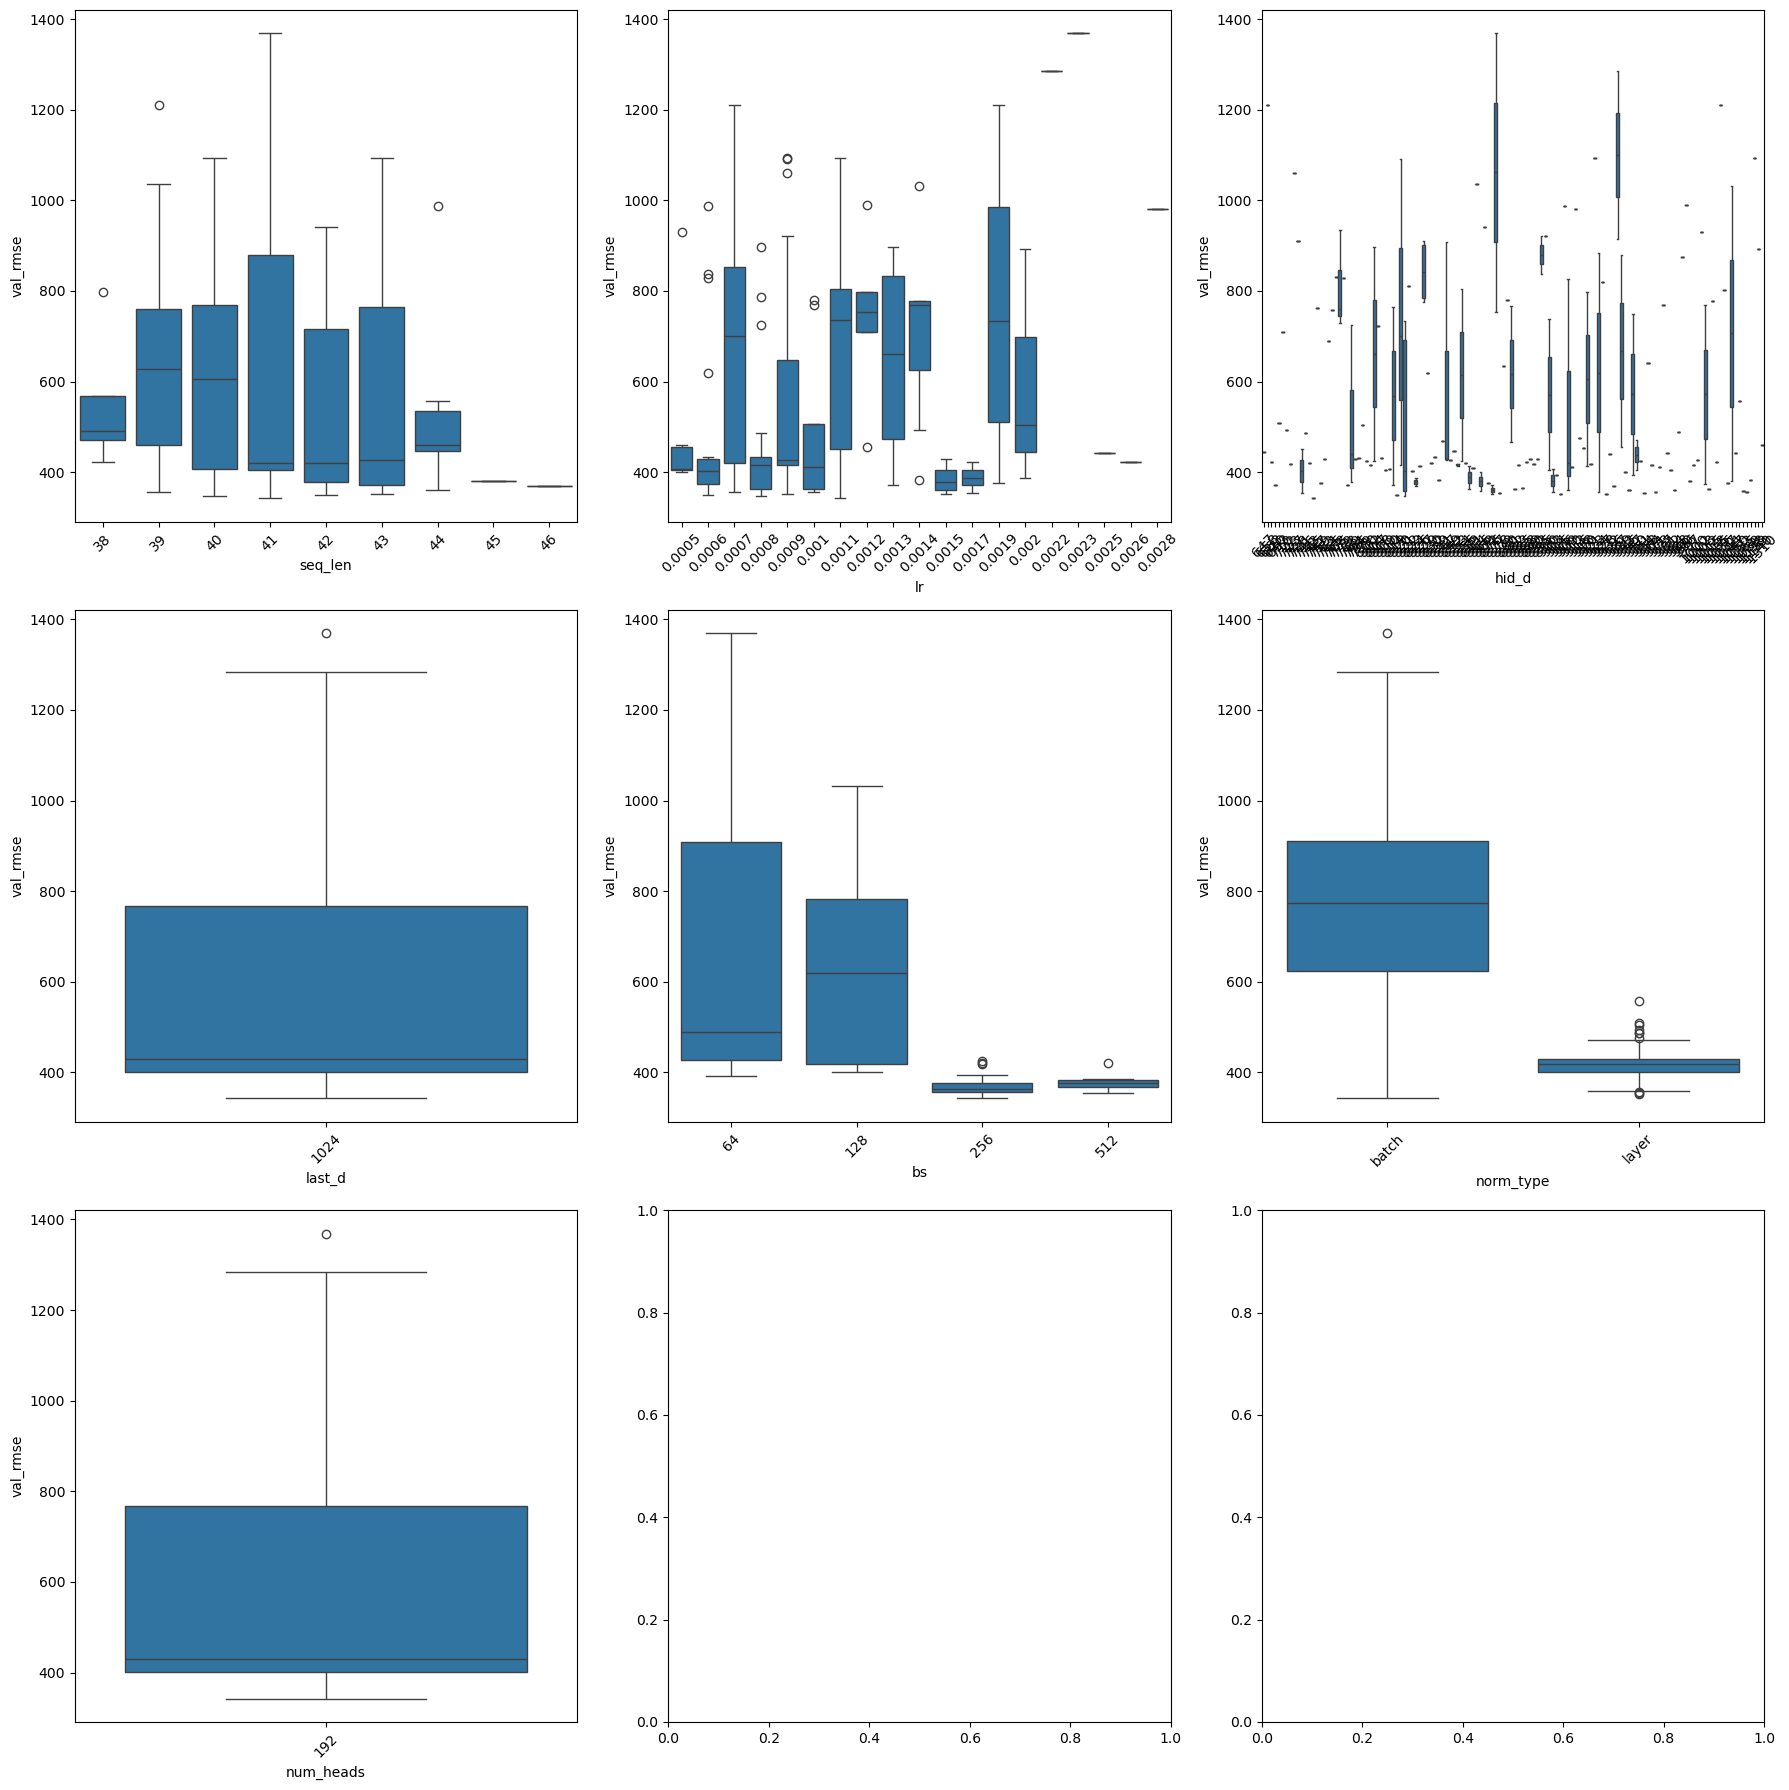

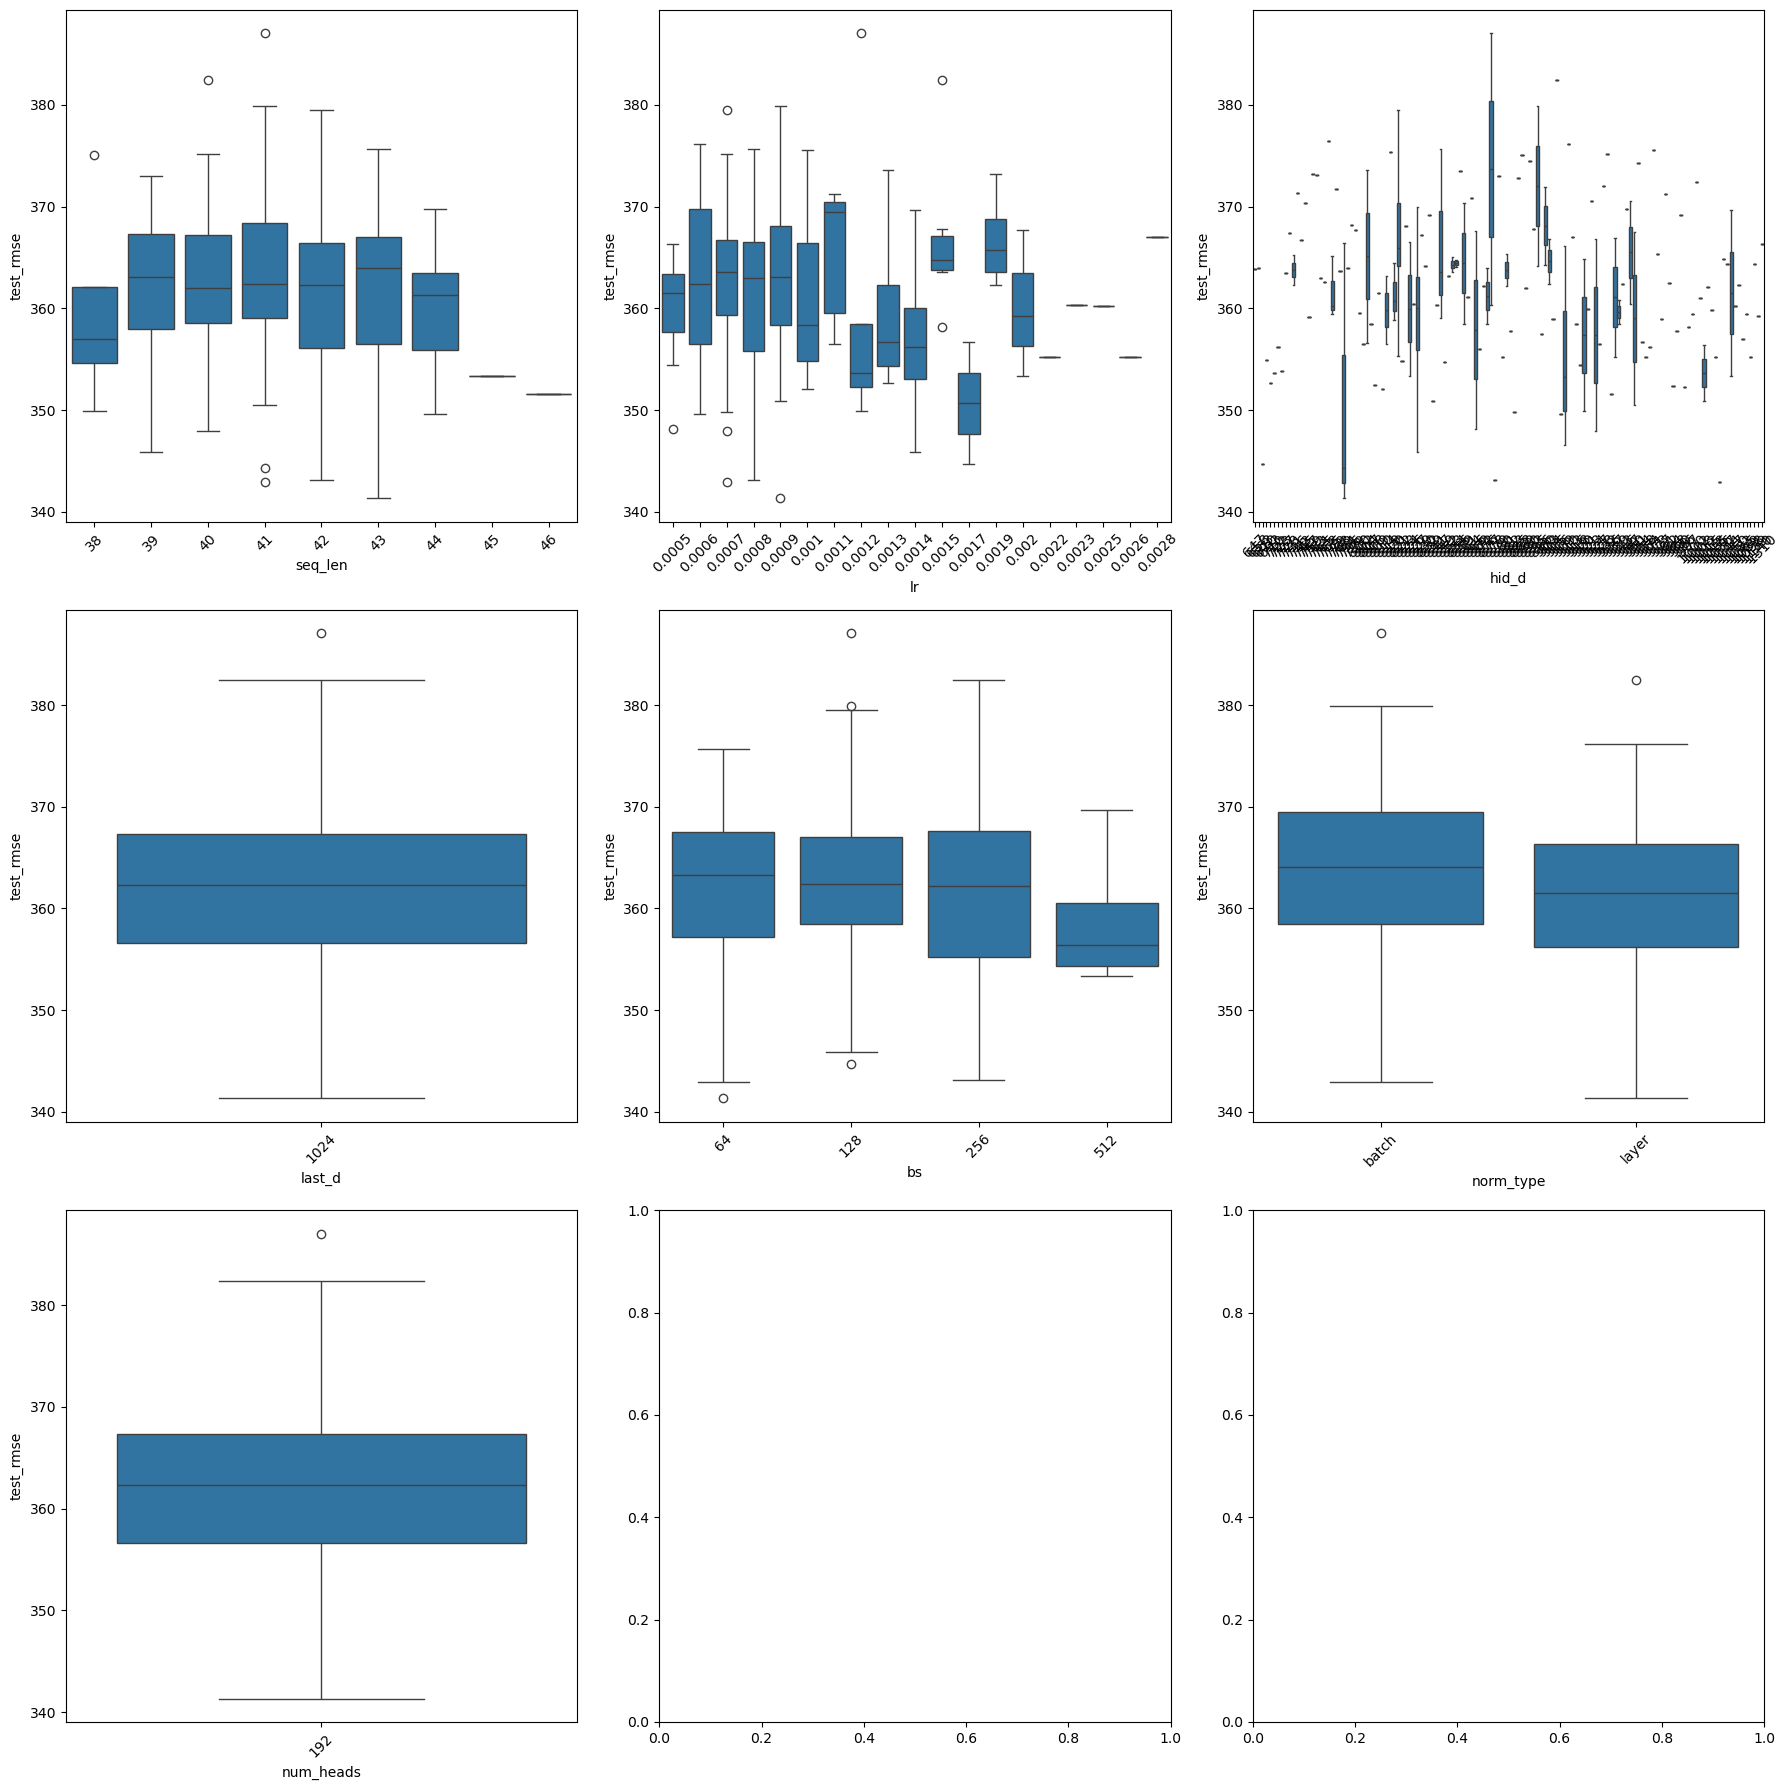

In [17]:
plot_rmse_effects(df, x=["seq_len", "lr", "hid_d", "last_d", "bs","norm_type","num_heads"])

In [18]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0.2* df["train_rmse"] +0.4* df["val_rmse"] + 0.4* df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse")


In [19]:
sorted_df

,exp_date,train_rmse,train_custom_acc,val_rmse_for_best_train,val_custom_acc_for_best_train,test_rmse_for_best_train,test_custom_acc_for_best_train,train_epoch_for_best_train,val_rmse,val_custom_acc,...,hid_d,last_d,tok_conv_k,dropout,bs,norm_type,use_pos_enc,num_heads,fc_layer_type,sum_rmse
65,2024-08-11 19:40,17.338930,96.508034,363.34634,47.057644,351.71094,36.380043,51,353.59564,46.324924,...,878,1024,9,0.2,256,batch,True,192,mha,282.145262
66,2024-08-11 17:23,16.563044,96.690453,371.66052,45.462551,347.41553,34.502007,54,361.77588,46.779205,...,909,1024,9,0.2,256,batch,True,192,mha,286.641801
122,2024-08-11 14:13,14.200474,97.257805,349.64400,48.629704,361.32925,32.462288,56,347.87134,48.938473,...,821,1024,10,0.2,256,batch,True,192,mha,287.663167
143,2024-08-11 14:20,13.637690,97.322258,344.77370,48.237061,376.42072,28.700180,58,342.43124,47.222580,...,745,1024,10,0.2,256,batch,True,192,mha,287.848166
69,2024-08-11 16:56,14.758443,97.039429,366.43658,49.931877,371.38303,43.174240,58,361.64890,49.319530,...,984,1024,9,0.2,256,layer,True,192,mha,288.538105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,2024-08-11 12:01,70.309440,85.220123,363.19504,49.005646,386.72168,39.964161,29,1094.16480,-25.308405,...,1139,1024,10,0.2,64,batch,True,192,mha,597.473596
125,2024-08-11 12:32,33.323013,93.609146,374.15533,46.128658,373.70273,35.245491,45,1210.39620,-17.982782,...,1036,1024,9,0.2,64,batch,True,192,mha,627.998827
169,2024-08-11 10:58,22.467833,95.708122,458.08392,34.081314,390.54404,44.202023,55,1210.80430,-22.680962,...,658,1024,15,0.2,64,batch,True,192,mha,634.418527
56,2024-08-11 11:54,101.878990,78.568230,977.51260,-13.011420,412.13504,40.023151,24,1284.60060,-22.596718,...,937,1024,11,0.2,64,batch,True,192,mha,676.295638


In [20]:

# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    # "train_custom_acc_for_best_val",
    # "train_custom_acc",
    # "val_custom_acc",
    # "test_custom_acc",
    # "train_custom_acc_for_best_test",
    # "val_custom_acc_for_best_train",
    # "val_custom_acc_for_best_test",
    # "test_custom_acc_for_best_train",
    # "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)



In [21]:

# print last few columns
print(output.iloc[:, -25:])

     val_custom_acc  train_rmse_for_best_val  train_custom_acc_for_best_val  \
65        46.324924                67.656110                      86.058083   
66        46.779205                43.511420                      91.785736   
122       48.938473                28.385357                      93.846085   
143       47.222580                22.715273                      96.075294   
69        49.319530                19.549942                      96.073601   
123       44.306976                50.336243                      89.729919   
59        43.692863                52.927994                      90.570107   
33        46.354301                39.735290                      93.968040   
91        40.193096                42.835970                      92.844803   
152       44.320633                85.871480                      81.327133   

     test_rmse_for_best_val  test_custom_acc_for_best_val  \
65                359.12482                     33.617664   
66      